In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans

In [81]:
os.listdir()

['seeds.csv',
 'seeds-width-vs-length.csv',
 'Seeds Clustering.ipynb',
 '.ipynb_checkpoints']

In [82]:
samples = pd.read_csv('seeds.csv', header = None)
seeds_w_l = pd.read_csv('seeds-width-vs-length.csv', header = None)

In [83]:
display(seeds.head())
display(seeds_w_l.head())

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [84]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
0    210 non-null float64
1    210 non-null float64
2    210 non-null float64
3    210 non-null float64
4    210 non-null float64
5    210 non-null float64
6    210 non-null float64
7    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [85]:
samples[7].astype(float)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
180    3.0
181    3.0
182    3.0
183    3.0
184    3.0
185    3.0
186    3.0
187    3.0
188    3.0
189    3.0
190    3.0
191    3.0
192    3.0
193    3.0
194    3.0
195    3.0
196    3.0
197    3.0
198    3.0
199    3.0
200    3.0
201    3.0
202    3.0
203    3.0
204    3.0
205    3.0
206    3.0
207    3.0
208    3.0
209    3.0
Name: 7, Length: 210, dtype: float64

In [86]:
print(samples.shape)
print(seeds_w_l.shape)

(210, 8)
(210, 2)


In [87]:
samples[7].unique()

array([1, 2, 3])

In [88]:
#samples[7] = samples[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat' })
#samples.rename(columns = {7: 'varieties'})

In [91]:
varieties = ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

## How many clusters of grain?


In [89]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(samples)
    inertias.append(model.inertia_)

inertias

[2859.852410177952,
 1147.2480596008331,
 625.7199966009624,
 512.5016042569625,
 430.0346692483599]

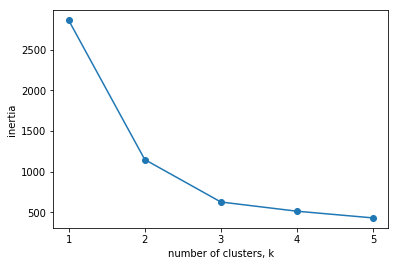

In [90]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

good number of clusters is 3

## Evaluating the grain clustering


In [25]:
model = KMeans (n_clusters = 3)
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)
type(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0          64          10
1                      70           5           0
2                       0           1          60


pandas.core.frame.DataFrame

The clustering seem to be okay/good

## Dendrogram

In [93]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [96]:
mergings = linkage(samples, method = 'complete')
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

IndexError: list index out of range